# Heart Disease Prediction

## Qual o objetivo em analisar esse banco de dados?

- Explorar e pré-processar os dados para acharmos o melhor modelo de classificação para esse conjunto de dados.

## Os modelos de machine learning testados nesse conjunto de dados serão:

- Decision Tree (Árvore de decisão)
- Random Forest (Floresta randômica)
- K-Nearest Neighbors (KNN)
- Support Vector Machines (SVM)

## Explicação das variáveis do conjunto de dados
1. HeartDisease: Os entrevistados que já relataram ter doença cardíaca coronária (CHD) ou infarto do miocárdio (MI).
2. BMI: Índice de Massa Corporal (IMC).
3. Smoking: Você fumou pelo menos 100 cigarros em toda a sua vida? (A resposta sim ou não).
4. AlcoholDrinking: bebedores pesados (homens adultos que bebem mais de 14 bebidas por semana e mulheres adultas que bebem mais de 7 bebidas por semana)
5. Stroke: você teve um derrame?
6. PhysicalHealth: Agora, pensando em sua saúde física, que inclui doenças e lesões físicas, por quantos dias nos últimos 30 dias sua saúde física não foi boa? (0-30 dias).
7. MentalHealth : Pensando em sua saúde mental, por quantos dias nos últimos 30 dias sua saúde mental não foi boa? (0-30 dias).
8. DiffWalking : Você tem sérias dificuldades para caminhar ou subir escadas?
9. Sex: Você é homem ou mulher?
10. AgeCategory: Categoria de idade dividida em quatorze faixas etárias.
11. Race: Qual a sua raça?
12. Diabetic: Você tinha diabetes?
13. PhysicalActivity: Adultos que relataram fazer atividade física ou exercício durante os últimos 30 dias, além de seu trabalho regular.
14. GenHealth: Você diria que, em geral, sua saúde é...
15. SleepTime: Em média, quantas horas de sono você dorme em um período de 24 horas?
16. Asthma: você teve asma?
17. KidneyDisease: Não incluindo cálculos renais, infecção da bexiga ou incontinência, você já foi informado de que tinha doença renal?
18. SkinCancer: você teve câncer de pele?


## Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

## Lendo o banco de dados

In [3]:
dados = pd.read_csv('/content/heart_2020_cleaned.csv')

In [3]:
dados

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


- Deixarei apenas 30.000 linhas desse banco de dados, pois já é suficiente para fins de demonstração.

In [4]:
dados = dados.drop(range(29999,319795))

## Algumas estatísticas sobre as variáveis numéricas desse conjunto de dados

In [5]:
dados.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,29999.000000,29999.000000,29999.000000,29999.000000
mean,28.059315,3.653655,3.977033,7.138805
std,6.296075,8.208764,7.935051,1.479396
min,12.400000,0.000000,0.000000,1.000000
25%,23.730000,0.000000,0.000000,6.000000
50%,27.120000,0.000000,0.000000,7.000000
75%,31.180000,2.000000,4.000000,8.000000
max,83.000000,30.000000,30.000000,24.000000


## Limpeza dos dados

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29999 entries, 0 to 29998
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      29999 non-null  object 
 1   BMI               29999 non-null  float64
 2   Smoking           29999 non-null  object 
 3   AlcoholDrinking   29999 non-null  object 
 4   Stroke            29999 non-null  object 
 5   PhysicalHealth    29999 non-null  float64
 6   MentalHealth      29999 non-null  float64
 7   DiffWalking       29999 non-null  object 
 8   Sex               29999 non-null  object 
 9   AgeCategory       29999 non-null  object 
 10  Race              29999 non-null  object 
 11  Diabetic          29999 non-null  object 
 12  PhysicalActivity  29999 non-null  object 
 13  GenHealth         29999 non-null  object 
 14  SleepTime         29999 non-null  float64
 15  Asthma            29999 non-null  object 
 16  KidneyDisease     29999 non-null  object

In [7]:
dados.nunique()

HeartDisease           2
BMI                 2078
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             22
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [8]:
dados['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

## Como podemos ver, a variável Diabetic tem 4 valores, então transformaremos os valores "No, borderline diabetes" (que significa pré-diabetes) para No, e, "Yes (during pregnancy)" para Yes. Irei aproveitar e transformarei os valores das variáveis que possuem apenas "Yes" ou "No" para "0" e "1". Já as variáveis que possuem mais de dois valores únicos, nós trataremos posteriormente.

In [5]:
dados = dados[dados.columns].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0, 'No, borderline diabetes': '0', 'Yes (during pregnancy)': '1'})
dados['Diabetic'] = dados['Diabetic'].astype(int)

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29999 entries, 0 to 29998
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      29999 non-null  int64  
 1   BMI               29999 non-null  float64
 2   Smoking           29999 non-null  int64  
 3   AlcoholDrinking   29999 non-null  int64  
 4   Stroke            29999 non-null  int64  
 5   PhysicalHealth    29999 non-null  float64
 6   MentalHealth      29999 non-null  float64
 7   DiffWalking       29999 non-null  int64  
 8   Sex               29999 non-null  int64  
 9   AgeCategory       29999 non-null  object 
 10  Race              29999 non-null  object 
 11  Diabetic          29999 non-null  int64  
 12  PhysicalActivity  29999 non-null  int64  
 13  GenHealth         29999 non-null  object 
 14  SleepTime         29999 non-null  float64
 15  Asthma            29999 non-null  int64  
 16  KidneyDisease     29999 non-null  int64 

## Análise exploratória e visualização dos dados

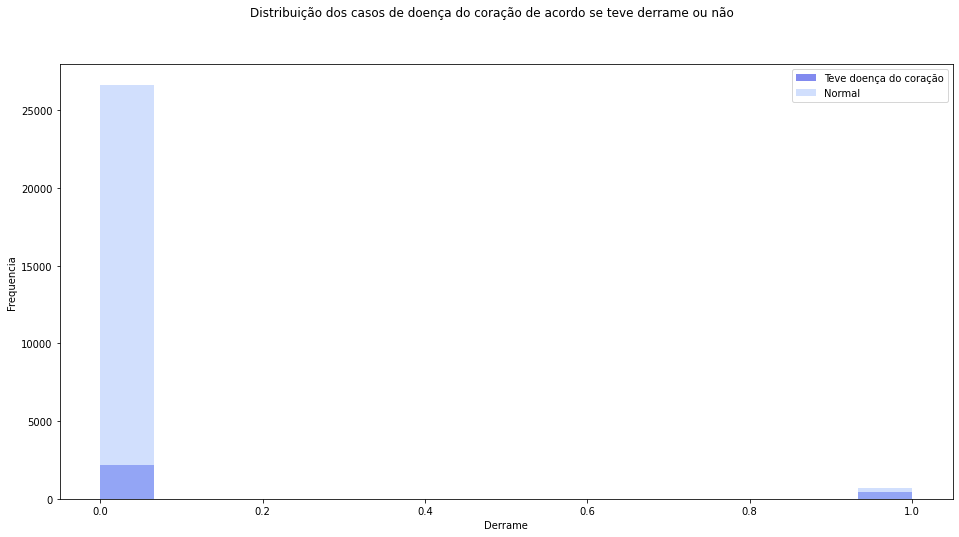

In [11]:
fig, ax = plt.subplots(figsize = (16,8))

ax.hist(dados[dados["HeartDisease"]==1]["Stroke"], bins=15, alpha=0.5, color="#0717E0", label="Teve doença do coração")
ax.hist(dados[dados["HeartDisease"]==0]["Stroke"], bins=15, alpha=0.5, color="#A4C1FC", label="Normal")

ax.set_xlabel("Derrame")
ax.set_ylabel("Frequencia")

fig.suptitle("Distribuição dos casos de doença do coração de acordo se teve derrame ou não")

ax.legend();


- Lembrando que o número 1 significa "Sim" e 0 significa "Não"
- Aqui podemos observar que poucas pessoas que foram entrevistadas tiveram derrame, mas nota-se que a maioria das pessoas que passaram por isso sofreram posteriormente de doença do coração.

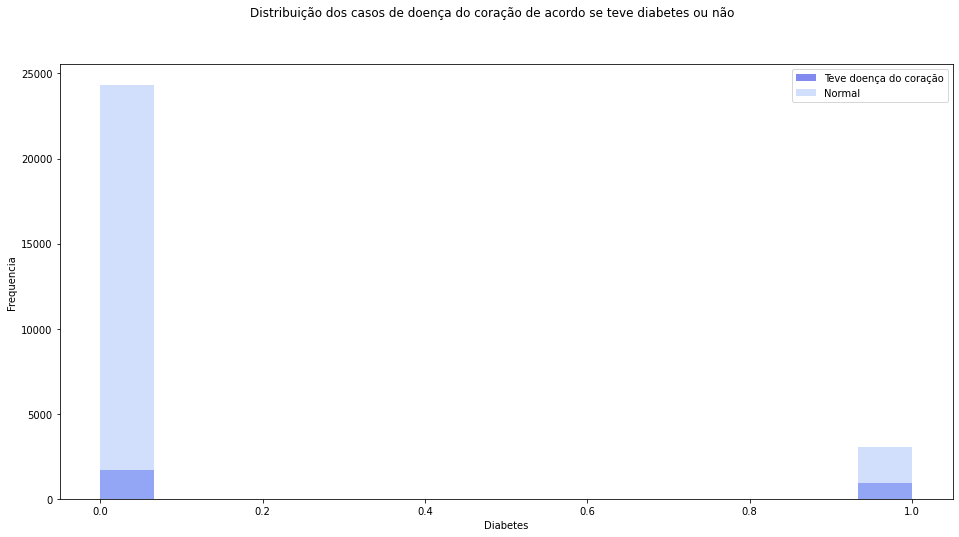

In [12]:
fig, ax = plt.subplots(figsize = (16,8))

ax.hist(dados[dados["HeartDisease"]==1]["Diabetic"], bins=15, alpha=0.5, color="#0717E0", label="Teve doença do coração")
ax.hist(dados[dados["HeartDisease"]==0]["Diabetic"], bins=15, alpha=0.5, color="#A4C1FC", label="Normal")

ax.set_xlabel("Diabetes")
ax.set_ylabel("Frequencia")

fig.suptitle("Distribuição dos casos de doença do coração de acordo se teve diabetes ou não")

ax.legend();

- Novamente podemos observar que a maioria dos entrevistados não possuíam diabetes, mas dos que sofriam com essa doença menos da metade tiveram doença do coração.

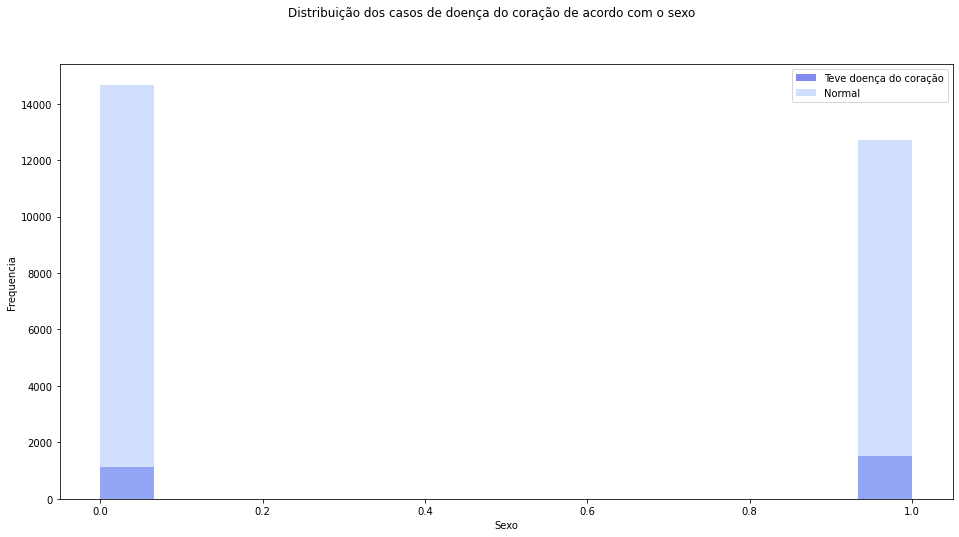

In [13]:
fig, ax = plt.subplots(figsize = (16,8))

ax.hist(dados[dados["HeartDisease"]==1]["Sex"], bins=15, alpha=0.5, color="#0717E0", label="Teve doença do coração")
ax.hist(dados[dados["HeartDisease"]==0]["Sex"], bins=15, alpha=0.5, color="#A4C1FC", label="Normal")

ax.set_xlabel("Sexo")
ax.set_ylabel("Frequencia")

fig.suptitle("Distribuição dos casos de doença do coração de acordo com o sexo")

ax.legend();

- Devemos nos lembrar que classificamos o numero 0 para mulher e 1 para homem
- podemos notar que:
    - há relativamente um número maior de mulheres pacientes;
    - mesmo com um menor número de pacientes homens, nota-se que possuem uma frequência maior de doença do coração se comparado com as mulheres;

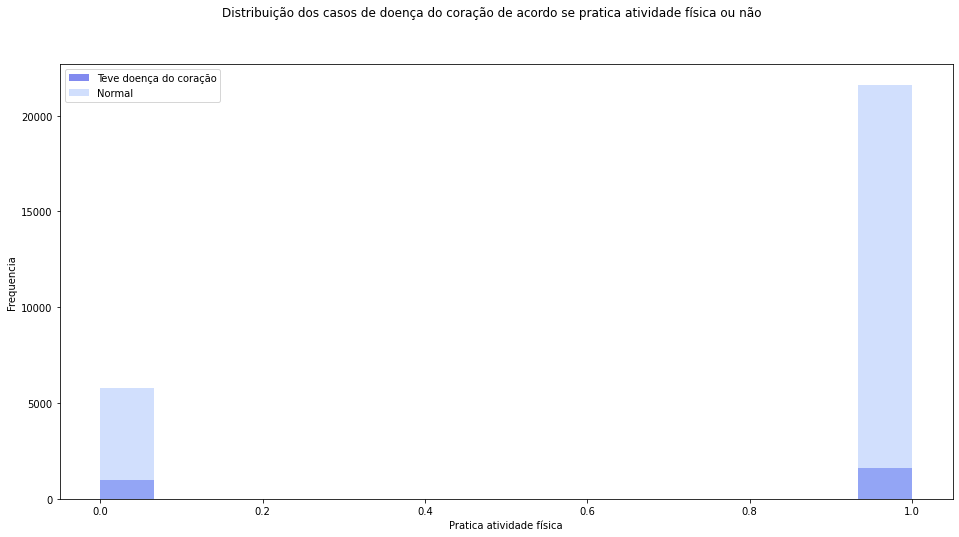

In [14]:
fig, ax = plt.subplots(figsize = (16,8))

ax.hist(dados[dados["HeartDisease"]==1]["PhysicalActivity"], bins=15, alpha=0.5, color="#0717E0", label="Teve doença do coração")
ax.hist(dados[dados["HeartDisease"]==0]["PhysicalActivity"], bins=15, alpha=0.5, color="#A4C1FC", label="Normal")

ax.set_xlabel("Pratica atividade física")
ax.set_ylabel("Frequencia")

fig.suptitle("Distribuição dos casos de doença do coração de acordo se pratica atividade física ou não")

ax.legend();

- Aqui podemos ver que a maioria dos entrevistados praticaram atividade física nos últimos 30 dias. Olhando agora para as frequências podemos imaginar que quem pratica atividade física tem menos chances de possuir doenças do coração.

## Análise de colinearidade

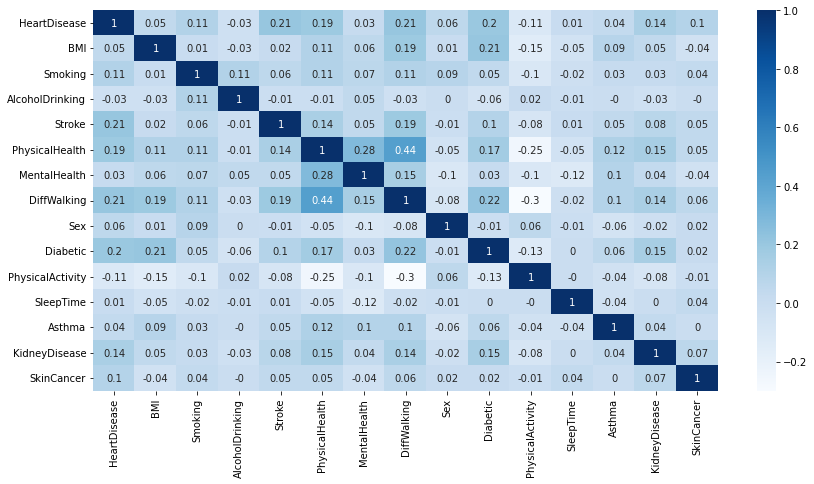

In [15]:
correlation = dados.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'Blues')

-Como podemos observar, nenhuma variável tem grande influência sobre outra. As variáveis que possuem a correlação mais alta são DiffWalking (dificuldade de andar) com PhysicalHealth (saúde fisica) e mesmo assim não é uma grande correlação.
-Seguiremos com todas as variáveis para o modelos

## Pré-processamento dos dados

### Escalonamento

In [6]:
from sklearn.preprocessing import StandardScaler 
num_cols = ['MentalHealth', 'BMI', 'PhysicalHealth', 'SleepTime']
Scaler = StandardScaler()
dados[num_cols] = Scaler.fit_transform(dados[num_cols])

### OneHotEncoder

In [7]:
from sklearn.preprocessing import OneHotEncoder 
enc = OneHotEncoder() 

categ = dados[['AgeCategory', 'Race', 'GenHealth']]
encoded_categ = pd.DataFrame(enc.fit_transform(categ).toarray())

dados = pd.concat([dados, encoded_categ], axis = 1)

dados = dados.drop(columns = ['AgeCategory', 'Race', 'GenHealth'], axis = 1)

In [18]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29999 entries, 0 to 29998
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      29999 non-null  int64  
 1   BMI               29999 non-null  float64
 2   Smoking           29999 non-null  int64  
 3   AlcoholDrinking   29999 non-null  int64  
 4   Stroke            29999 non-null  int64  
 5   PhysicalHealth    29999 non-null  float64
 6   MentalHealth      29999 non-null  float64
 7   DiffWalking       29999 non-null  int64  
 8   Sex               29999 non-null  int64  
 9   Diabetic          29999 non-null  int64  
 10  PhysicalActivity  29999 non-null  int64  
 11  SleepTime         29999 non-null  float64
 12  Asthma            29999 non-null  int64  
 13  KidneyDisease     29999 non-null  int64  
 14  SkinCancer        29999 non-null  int64  
 15  0                 29999 non-null  float64
 16  1                 29999 non-null  float6

## Dividindo o conjunto de dados em variáveis explicativas e variável respota. Nesse caso a nossa variável de interesse (variável resposta) é a HearthDisease

In [8]:
explicativas = dados.drop(columns =['HeartDisease'], axis = 1)

resposta = dados['HeartDisease']

In [9]:
explicativas = explicativas.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True).values
resposta = resposta.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True).values

## Tuning dos parâmetros com GridSearchCV

### Decision Tree

In [9]:
parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 5]}

In [10]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(explicativas, resposta)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'random'}
0.900596932822137


### Random Forest

In [11]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 5]}

In [12]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(explicativas, resposta)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 40}
0.914897160637884


### K-Nearest Neighbors (KNN)

In [18]:
parametros = {'n_neighbors': [3, 5, 10],
              'p': [1, 2]}

In [19]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(explicativas, resposta)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 10, 'p': 2}
0.9117304106239927


### Support Vector Machines (SVM)

In [10]:
parametros = {'tol': [0.0001, 0.00001],
              'C': [1.0, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [ ]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(explicativas, resposta)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)